In [14]:
PROC_TRAIN_DATA_PATH = "../../data/interim/1__analytics_preprocessed_df.pkl"
FIG_DIR = "../../reports/figures/"

# Import packages

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# import plotly.express as px
# import plotly.graph_objects as go
# import plotly.figure_factory as ff

# from scipy import stats

# import warnings
# warnings.filterwarnings('ignore')


# from sklearn.preprocessing import MultiLabelBinarizer, Normalizer

In [16]:
# Change some pandas display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.width', 1000)
pd.set_option("styler.format.precision", 10)

# Data reading

In [17]:
df_train = pd.read_pickle(PROC_TRAIN_DATA_PATH)


In [18]:
# Obtain cat and num columns
cat_cols = df_train.select_dtypes('object').columns.to_list()[:-1] 
num_cols = df_train.select_dtypes(np.number).columns.to_list()


In [19]:
# Show a small batch of data
df_train.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic,maximum heart rate,exercise induced angina,ST depression,slope peak exercise ST segment,number of major vessels,thallium stress result,target
156,58.0,male,asymptomatic,125.0,300.0,> 120 mg/dl,ventricular hypertrophy,171.0,no,0.0,upsloping,2.0,reversible defect,LAD
118,65.0,male,asymptomatic,135.0,254.0,> 120 mg/dl,ventricular hypertrophy,127.0,no,2.8,flat,1.0,reversible defect,LCX
277,57.0,male,atypical angina,154.0,232.0,> 120 mg/dl,ventricular hypertrophy,164.0,no,0.0,upsloping,1.0,normal,LAD
142,64.0,male,non-anginal,125.0,309.0,> 120 mg/dl,normal,131.0,yes,1.8,flat,0.0,reversible defect,LAD
297,45.0,male,typical angina,110.0,264.0,> 120 mg/dl,normal,132.0,no,1.2,flat,0.0,reversible defect,LAD


# Statistical analysis

In [20]:
# Categorical features
df_train.describe(include='object').T

,count,unique,top,freq
sex,226,2,male,156
chest pain type,226,4,asymptomatic,102
fasting blood sugar,226,2,> 120 mg/dl,191
resting electrocardiographic,226,3,normal,119
exercise induced angina,226,2,no,151
slope peak exercise ST segment,226,3,upsloping,108
thallium stress result,226,4,normal,122
target,226,5,no disease,124


# Personal view

The most common feature that help in indectication of heart desease are:
fasting blood sugar,
exercise induced angina

the slop of ST segment: 


thallium stress result: the flow of blood to your heart through your coronary arteries

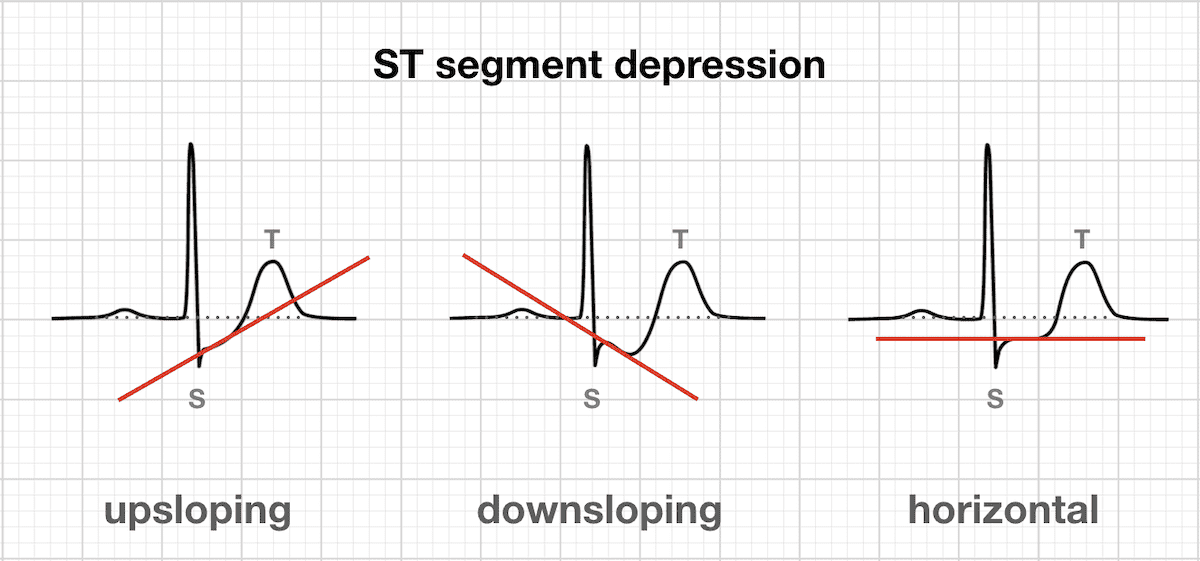


# Balancing
Check if the training data is well balanced because one of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

In [8]:
# Numerical features
df_train.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
age,226.0,54.278761,9.192131,34.0,47.25,55.0,61.0,77.0
resting blood pressure,226.0,129.707965,17.149373,94.0,120.00,130.0,140.0,200.0
serum cholestoral,226.0,247.637168,53.010533,126.0,212.00,240.5,275.0,564.0
maximum heart rate,226.0,149.190265,22.860429,71.0,132.25,152.5,166.0,195.0
ST depression,226.0,1.000442,1.086298,0.0,0.00,0.8,1.6,5.6
number of major vessels,222.0,0.675676,0.962295,0.0,0.00,0.0,1.0,3.0


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

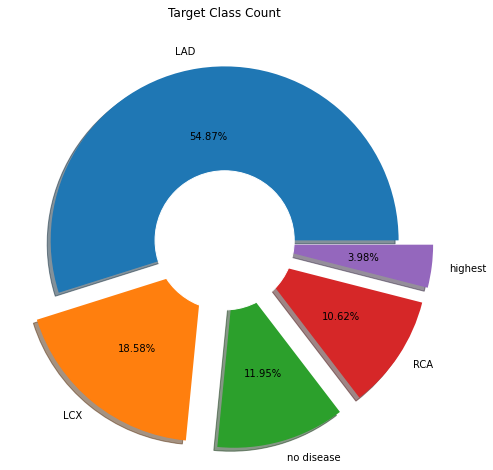

In [11]:
def check_balancing(data, target_name):
    """
    Check if the target's classes are balanced between each other
    """
    # Target Class count
    plt.figure(figsize=(8, 8))
    plt.pie(
        data[target_name].value_counts(),
        labels=data[target_name].unique(),
        autopct="%1.2f%%",
        explode=[0, 0.2, 0.2, 0.2, 0.2],
        shadow=True,
    )

    my_circle = plt.Circle((0, 0), 0.4, color="white")
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title("Target Class Count")


check_balancing(df_train, "target")
plt.plot


# Plotting

## Categorical features
The conclusions is the following features play good role to identify presence or absence of the disease:
- **slope peak exercise ST segment** 
- **exercise induced angina** 
- **chest pain type**
- **sex**


Index(['sex', 'chest pain type', 'fasting blood sugar', 'resting electrocardiographic', 'exercise induced angina', 'slope peak exercise ST segment', 'thallium stress result'], dtype='object')


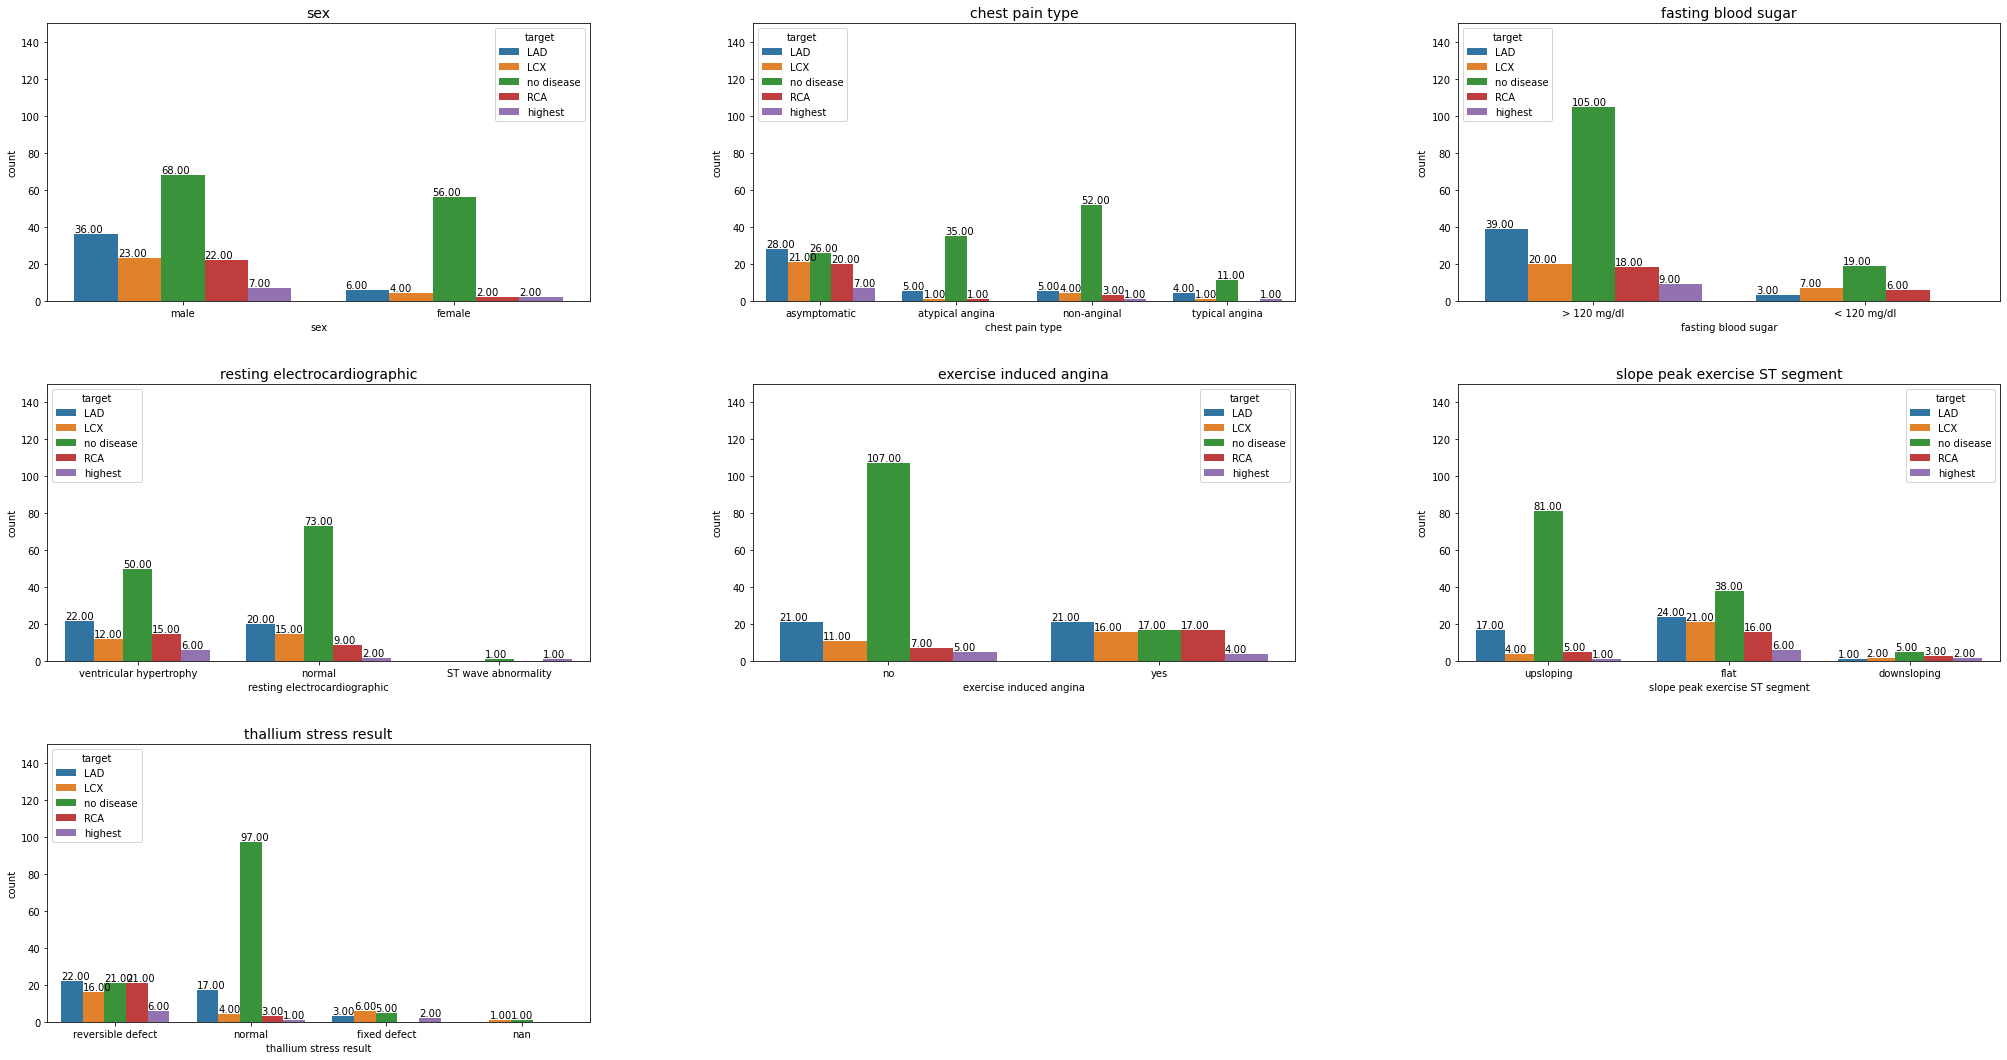

In [42]:
from typing import Any, Callable
from functools import wraps
def parse_plot_cat(func: Callable[..., Any]):
    @wraps(func)
    def wrapper(*args, **kwargs):
        
        data = kwargs['data']
        hue = kwargs['hue']
        
        # Exclude hue variable from columns
        cols = data.columns[data.columns != hue]
        
        figure = plt.figure(figsize=(35,25))
        figure.subplots_adjust(wspace=0.3, hspace=0.3)
        

        for i, col in enumerate(cols, start=1):
            ax = figure.add_subplot(4, 3, i)
            # func(data=data, x=x, hue=hue, hue_order=hue_order, ax=ax, palette=palette)
            func(*args, **kwargs, x=col, ax=ax, title=col)
            
    return wrapper 


@parse_plot_cat
def plot_cat_var(
    data:pd.DataFrame, 
    x:str=None, 
    hue:str=None, 
    hue_order=None, 
    ax:plt.Axes=None, 
    palette:str=None, 
    title:str=None
):
    graph = sns.countplot(data=data, x=x, hue=hue, hue_order=hue_order, ax=ax, palette=palette)
    for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()+1))
    graph.set_title(title, fontsize=14)
    graph.set_ylim([0, 150])
  

plot_cat_var(data=df_train[cat_cols+['target']], hue='target')

## Numerical data
The conclusions is the following features play good role to identify presence or absence of the disease:
- **max heart rate** 
- **age** 
- **ST depression**


In [ ]:
hue_order=['no disease', 'LAD','LCX', 'RCA', 'highest']

min_val = df_train['age'].min()
max_val = df_train['age'].max()
df_train['age_encoded'] = pd.cut(df_train['age'], bins=[min_val, 41, 55, max_val], labels=['Adults','Middle-Aged','Senior'])
# sns.catplot(x='age_encoded', hue='target', hue_order=['no disease','risk 1','risk 2','risk 3','risk 4'], data=df_train, kind='count', ci=None, palette='Reds')


### Histogram - Probability
*Observations* :
- **ST Depression** & **Number of major Vessels** is Right Skewed.<br>
- **Age** & **Resting Blood Pressure** & **Maximum Heart Rate** are close to Normal / Gaussian Distribution.

- **Risk** is increasing gradually with the age. 
- **Resting Blood Pressure** is noticeably increasing when the risk of heart disease is high.


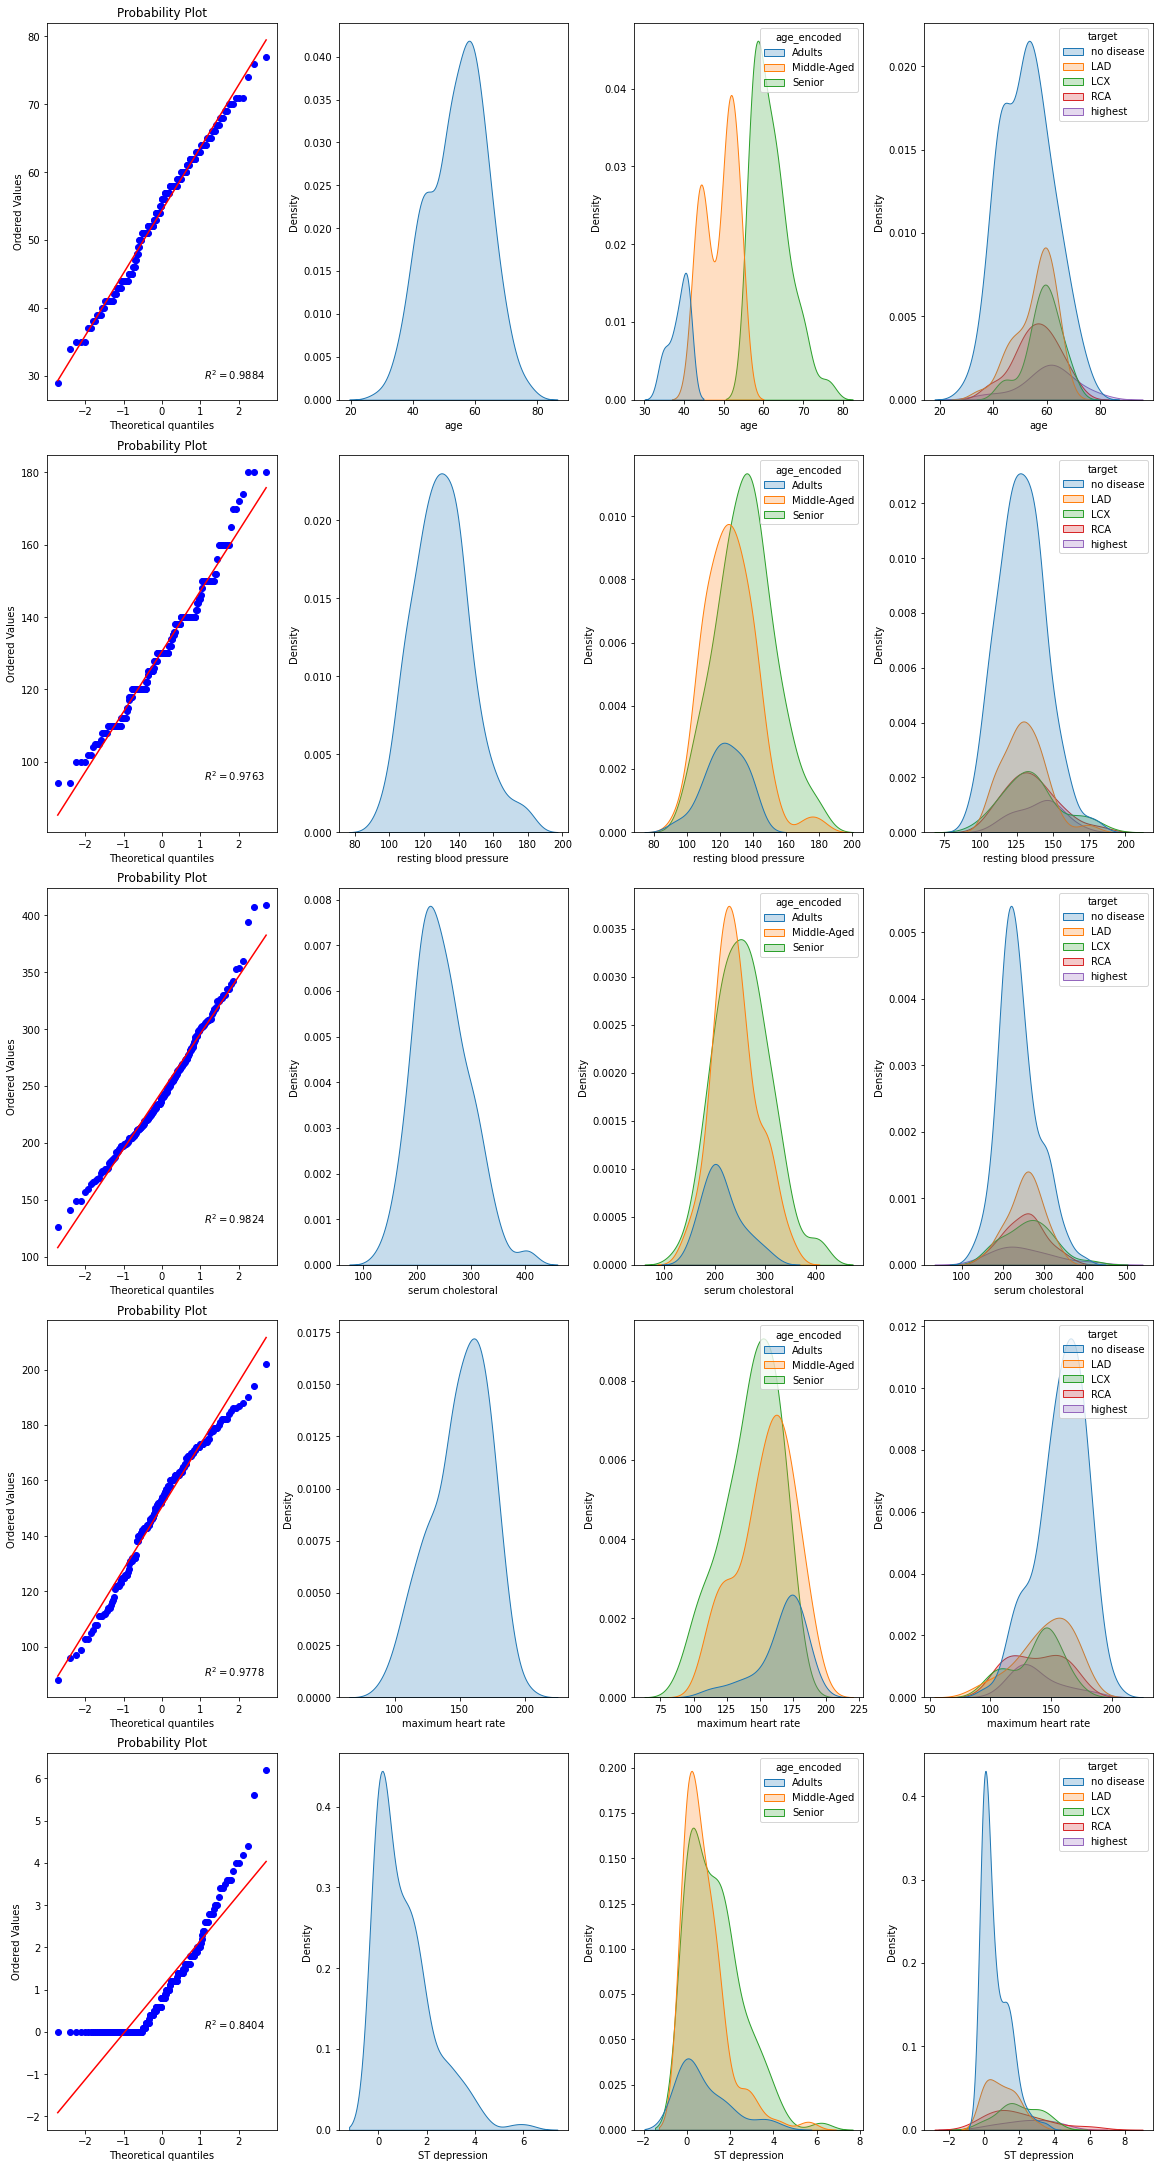

In [ ]:
def plot_kde(data):
    cols = list(filter(lambda x: x not in ['target','age_encoded'], data.columns.to_list()))
    sub_num_of_row = len(cols)
    sub_num_of_col = 4     # three columns: overall, no disease, disease

    _, axs = plt.subplots(nrows=sub_num_of_row, ncols=sub_num_of_col, figsize=(16, 30), constrained_layout = True)


    for i in range(sub_num_of_row):
        stats.probplot(x= data[cols[i]], plot=axs[i][0], rvalue=True)
        sns.kdeplot(data=data, x=cols[i], fill=True, ax=axs[i][1])
        sns.kdeplot(data=data, x=cols[i], hue='age_encoded', fill=True, ax=axs[i][2])
        sns.kdeplot(data=data, x=cols[i], hue='target', hue_order=hue_order , fill=True, ax=axs[i][3])
        
#        
plot_kde(df_train[num_cols + ['target', 'age_encoded']])

#### Bar

<AxesSubplot:xlabel='target'>

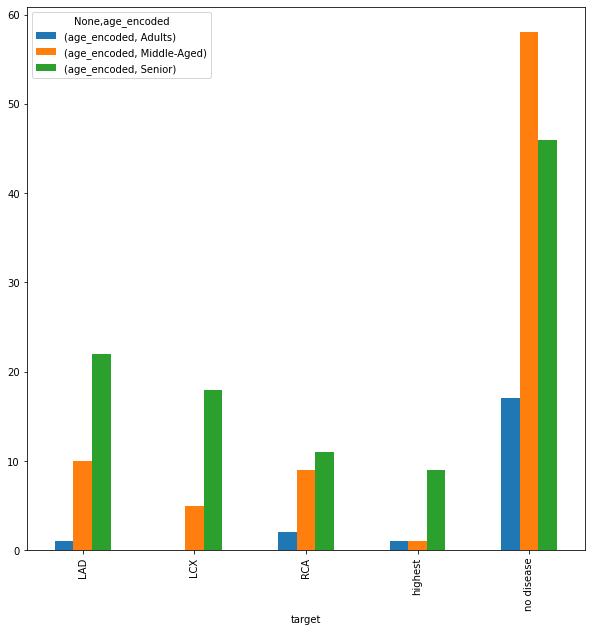

In [ ]:
df_train.groupby(['target', 'age_encoded'])['age_encoded'].count().to_frame().unstack().plot(kind='bar', stacked=False, figsize=(10,10))

#### Box
*Observations*:
- **resting blood pressure** & **serum cholestoral** are increasing by age group and gender.
- **maximum heart rate** is decreasing by age group and gender.


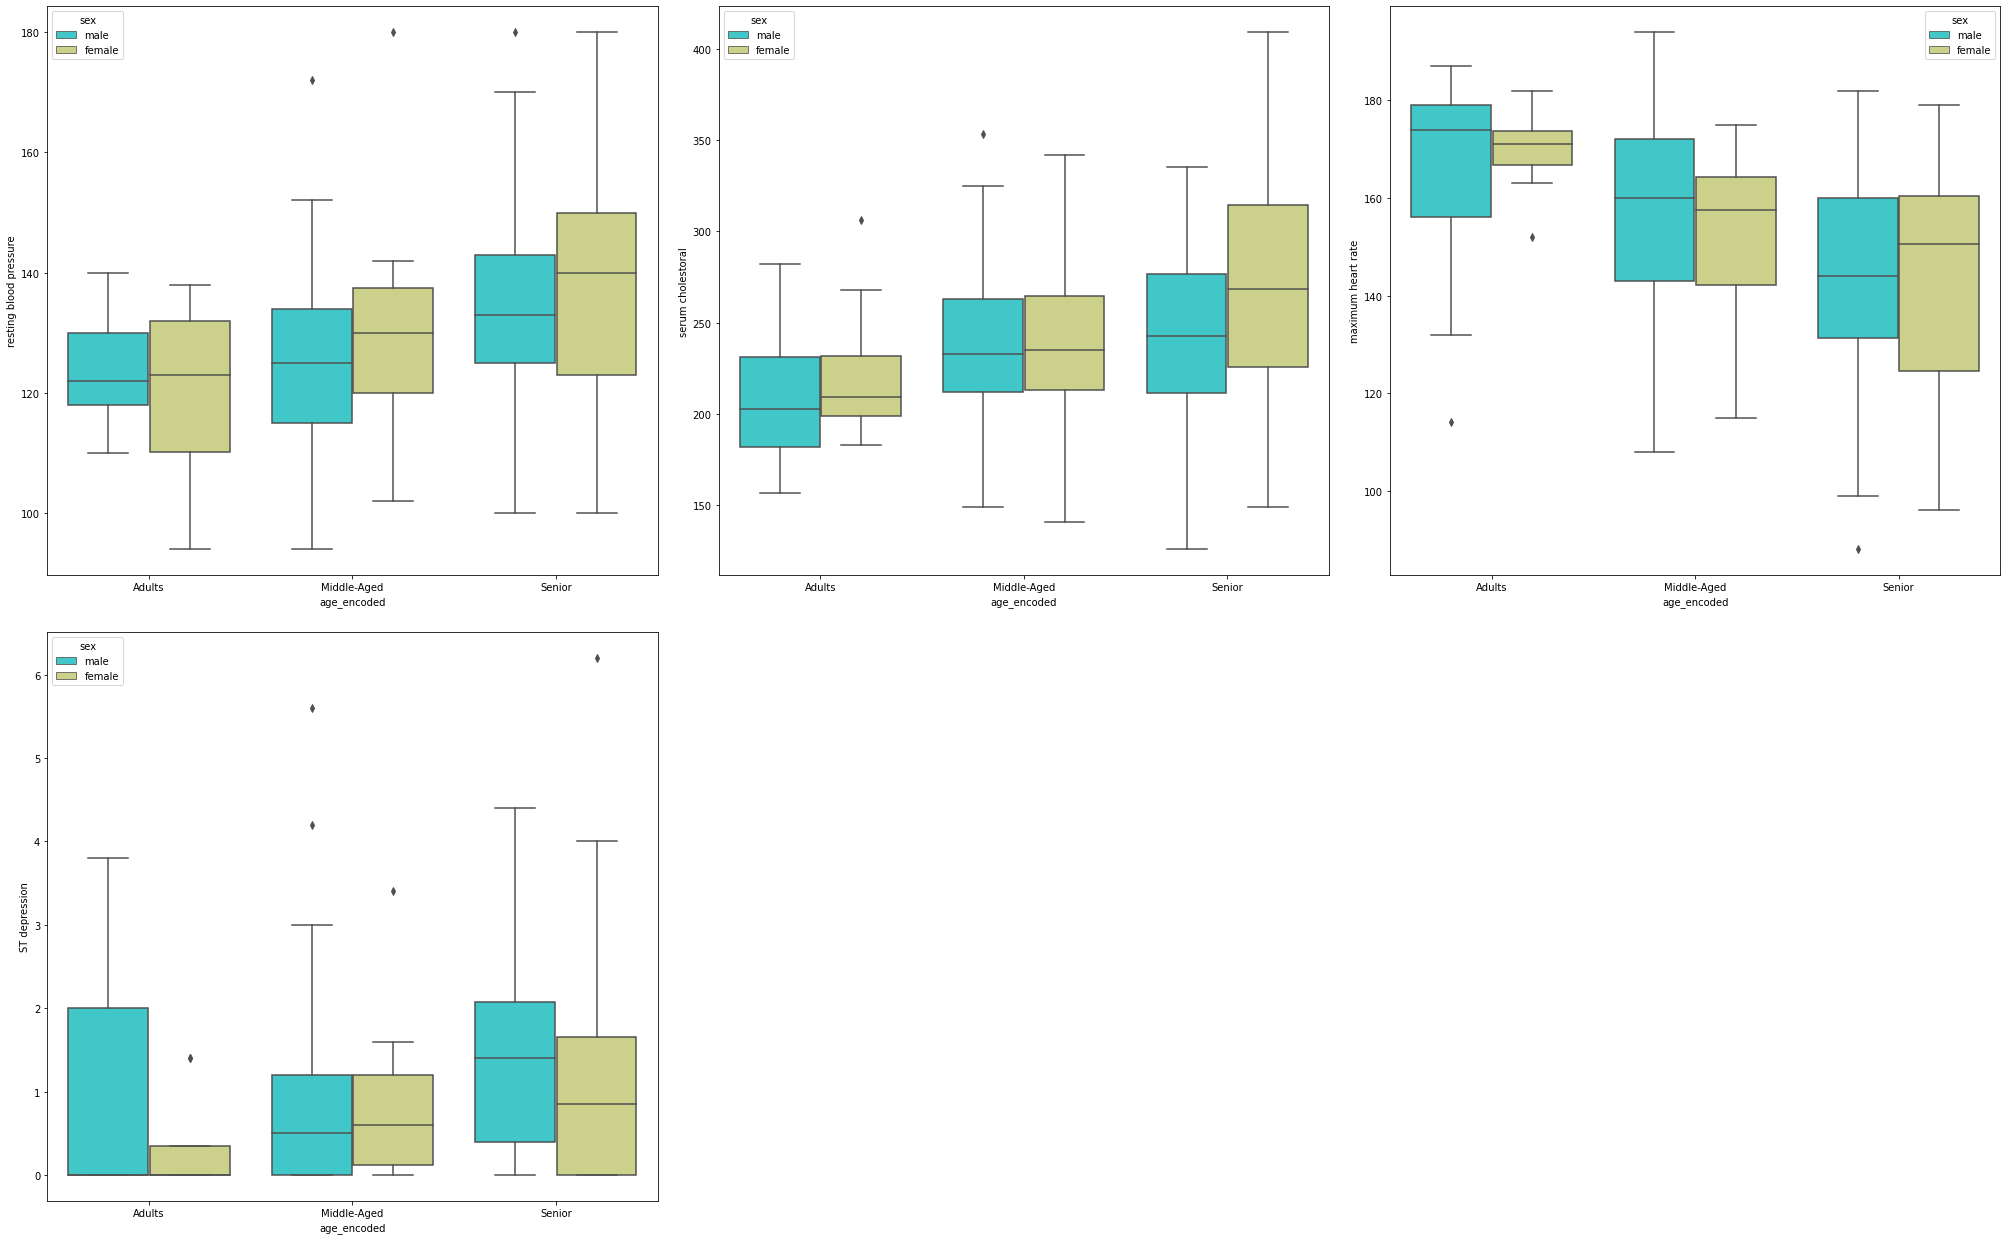

In [ ]:
def plot_boxen(data):
    cols = list(filter(lambda x: x not in cat_cols+['age','target','age_encoded'], data.columns.to_list()))

    figure = plt.figure(figsize=(35,45))
    figure.subplots_adjust(wspace=0.1, hspace=0.1)
    

    for i, col in enumerate(cols, start=1):
        ax = figure.add_subplot(4, 3, i)
        sns.boxplot(x='age_encoded', y=col, hue='sex', data=data, palette='rainbow', ax=ax)
        

plot_boxen(df_train)


#### Pairplot

In [ ]:
# sns.pairplot(data=train_w_cat_data[num_cols + ['target']], hue='target', corner=True, palette='Set1')